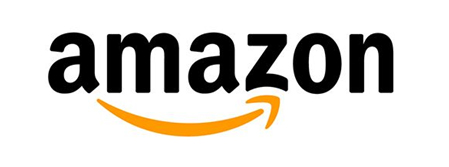

In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd

#from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.holtwinters import Holt,SimpleExpSmoothing,ExponentialSmoothing,HoltWintersResults
from sklearn.model_selection import KFold
import tensorflow as tf

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=15)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

### Importing data
Conjunto de datos: Acciones de Amazon

In [3]:
# cambiar de str a datetime
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

stock_price=pd.read_csv('Amazon.csv',parse_dates=['Date'], index_col='Date',date_parser=dateparse)

In [5]:
stock_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [6]:
stock_price.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-23,3380.050049,3428.959961,3380.050049,3416.000000,3416.000000,2379400
2021-09-24,3402.010010,3429.260010,3393.399902,3425.520020,3425.520020,2113600
2021-09-27,3371.500000,3415.570068,3339.610107,3405.800049,3405.800049,3634500
2021-09-28,3357.709961,3369.189941,3290.100098,3315.959961,3315.959961,4425600
2021-09-29,3322.110107,3351.300049,3298.000000,3324.547119,3324.547119,1893888


In [7]:
stock_price.shape

(6135, 6)

In [8]:
stock_price.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
stock_price.isna().sum() #No presenta filas vacias

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Verificar tipos de datos en columnas

In [10]:
stock_price.info() #No presenta valores nulos 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6135 entries, 1997-05-15 to 2021-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6135 non-null   float64
 1   High       6135 non-null   float64
 2   Low        6135 non-null   float64
 3   Close      6135 non-null   float64
 4   Adj Close  6135 non-null   float64
 5   Volume     6135 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.5 KB


In [11]:
#Comprobando si faltan valores en las columnas
stock_price.isna().values.any()

False

### Descripción de nuestro conjunto de datos
Resumen de estadísticas descriptivas

In [12]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6135.000000,6135.000000,6135.000000,6135.000000,6135.000000,6.135000e+03
mean,511.412293,516.998655,505.201814,511.292742,511.292742,7.344205e+06
std,843.427503,852.011112,833.571153,842.945709,842.945709,7.156024e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.680000,39.480000,38.056249,38.750000,38.750000,3.589300e+06
50%,92.000000,93.750000,90.099998,92.209999,92.209999,5.476400e+06
75%,520.365021,527.709992,513.049988,520.909973,520.909973,8.308050e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [13]:
stock_price_copy=stock_price.copy()

In [14]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6135 entries, 1997-05-15 to 2021-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6135 non-null   float64
 1   High       6135 non-null   float64
 2   Low        6135 non-null   float64
 3   Close      6135 non-null   float64
 4   Adj Close  6135 non-null   float64
 5   Volume     6135 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.5 KB


### Visualizando el precio de cierre diario de la acción

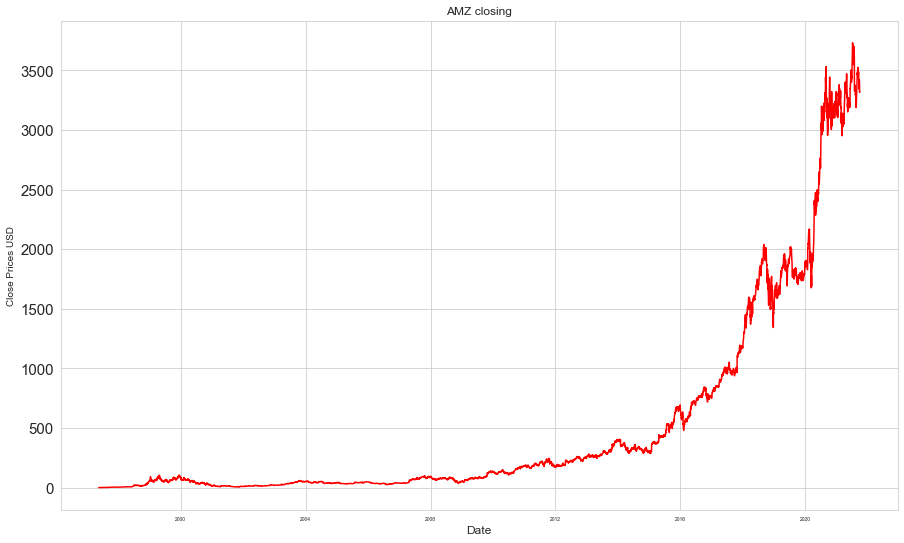

In [15]:
#plotting close price
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Prices USD')
plt.plot(stock_price['Close'], color='red')
plt.title('AMZ closing')
plt.show()

### Ahora visualicemos un Diagrama de Dispersión

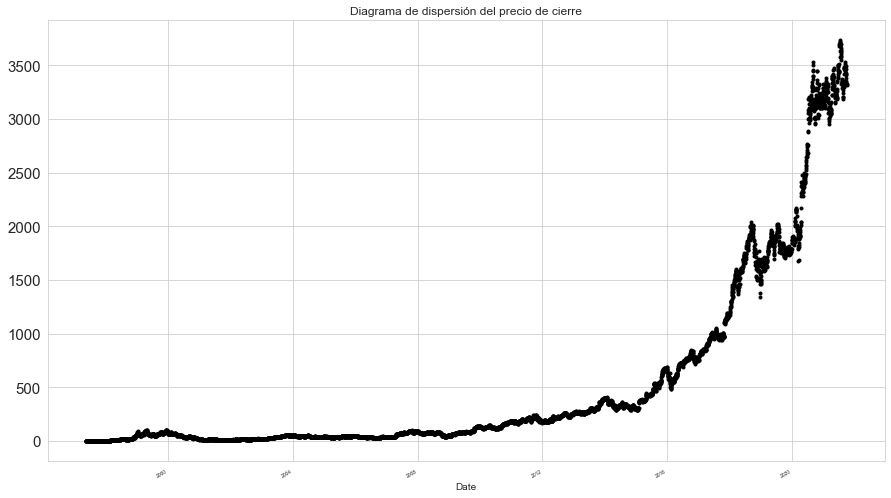

In [16]:
w_close = stock_price['Close'] 
plt.figure(figsize=(15,9))
w_close.plot (style = 'k.') 
plt.title ('Diagrama de dispersión del precio de cierre') 
plt.show ()

<AxesSubplot:>

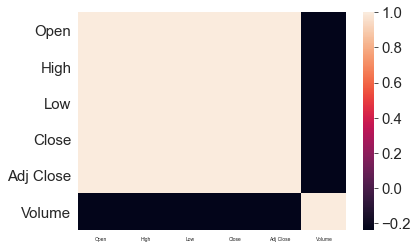

In [17]:
sns.heatmap(stock_price.corr())

### Analizando las acciones de Amazon

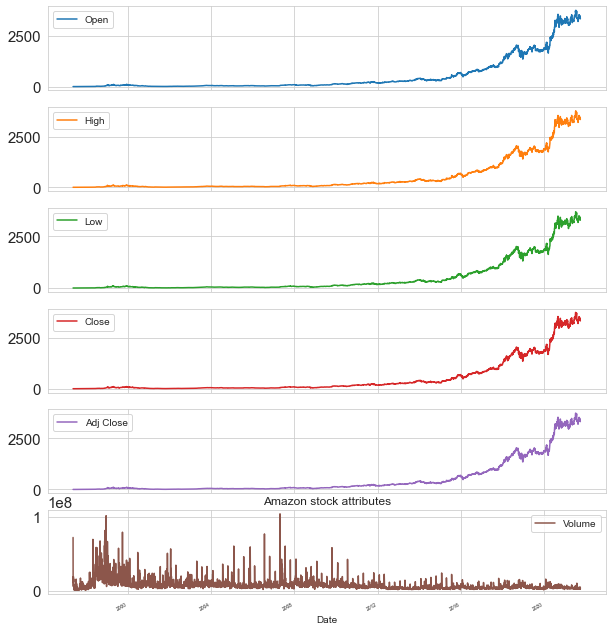

In [18]:
stock_price.plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes')
plt.savefig('stocks.png')
plt.show()

### Descomposición de la serie temporal
Ahora descompondremos la Serie temporal y buscaremos Niveles, Tendencias y Estacionalidad en los datos.

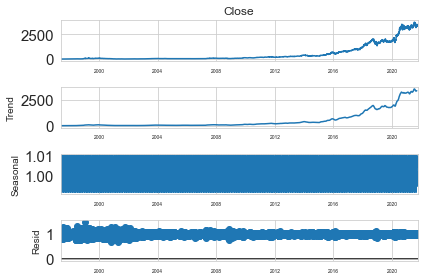

In [20]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(stock_price['Close'], model='multiplicative', freq = 30)
result_mul.plot();

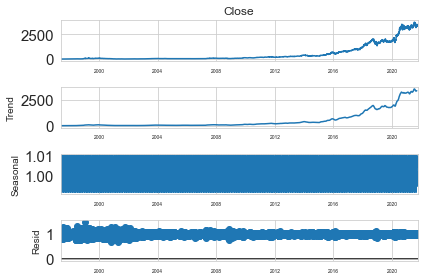

In [21]:
# Additive Decomposition
result_add = seasonal_decompose(stock_price['Close'], model='additive', freq = 30)
result_mul.plot();

### Revizando la estacionariedad
Prueba ADF (Dickey-Fuller aumentada)

In [22]:
X = stock_price['Close']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.882162
p-value: 1.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


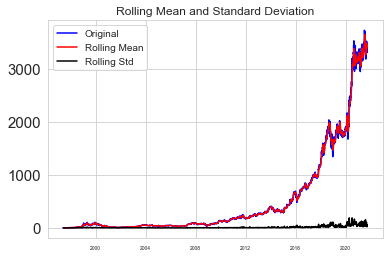

Results of dickey fuller test
Test Statistics                   3.882162
p-value                           1.000000
No. of lags used                 34.000000
Number of observations used    6100.000000
critical value (1%)              -3.431422
critical value (5%)              -2.862014
critical value (10%)             -2.567022
dtype: float64


In [23]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(w_close)

In [25]:
X_data = stock_price.drop(['Volume'],axis=1).values
y_data = stock_price['Close'].values

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_data= scaler.fit_transform(X_data)
y_data = scaler.fit_transform(y_data.reshape(-1,1))

In [27]:
X_test = X_data[4287:]
y_test = y_data[4287:]

In [28]:
T=24
X_input=[]
y_input=[]
for i in range(T,len(X_data)):
    X_input.append(X_data[i-T:i,])
    y_input.append(y_data[i,])

In [29]:
X_input = np.asarray(X_input)
y_input = np.asarray(y_input)

In [30]:
X_input.shape

(6111, 24, 5)

In [31]:
kf = KFold(n_splits=5,shuffle=True,random_state=900)
test_pred = []
for fold,(train_idx,test_idx) in enumerate(kf.split(X_input,y_input)):
    print(f'[+] Fold{fold+1}')
    x_train,x_valid = X_input[train_idx],X_input[test_idx]
    y_train,y_valid = y_input[train_idx],y_input[test_idx]
    schedul = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 200*((len(X_data)*0.8)/1024), 1e-5)
    model1 = tf.keras.layers.Input(shape=(24,5))
    x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024, return_sequences=True,activation='tanh'))(model1)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True,activation='tanh'))(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True,activation='tanh'))(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True,activation='tanh'))(x)
    x = tf.keras.layers.Dense(100, activation='relu')(x)
    x = tf.keras.layers.Dense(1)(x)

    model = tf.keras.models.Model(inputs = model1,outputs=x)

    
    model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=30, batch_size=32, callbacks=[tf.keras.callbacks.LearningRateScheduler(schedul)])
    model.save(f'fold{fold+1} LSTM weights')
    test_pred.append(model.predict(X_test.reshape(77, 24, 5)).squeeze().reshape(-1, 1).squeeze())

[+] Fold1
Epoch 1/30
  5/153 [..............................] - ETA: 7:31 - loss: 0.0546 - accuracy: 0.0000e+00

KeyboardInterrupt: 